# Bagging

Bagging, also known as bootstrap aggregation.

 It is the ensemble learning method that is commonly used to reduce variance within a noisy data set.

<h2>Implementation Steps of Bagging
</h2>

<h3>Step 1: Generate Bootstrap Samples</h3>
From the original dataset, D with N data points, several new datasets are created by sampling from D with replacement. Each new dataset will also haveN points but may contain duplicates because of the replacement.

### Step 2: Train Models on Bootstrap Samples
A separate model is trained on each bootstrap sample. This can be any machine learning algorithm, but decision trees (like in Random Forests) are commonly used due to their high variance.

### Step 3: Aggregate Predictions
After training, each model will produce its predictions. These predictions are then combined:

For regression tasks, the final prediction is typically the average of all model predictions.
For classification tasks, the final output is usually based on majority voting, where the class with the most votes is selected.

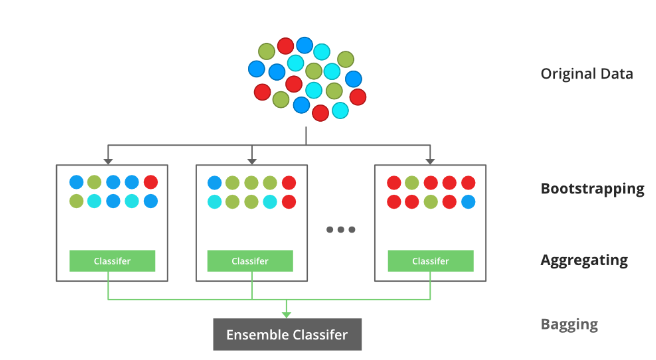

<h3>Why it's useful</h3>
Bagging helps to reduce variance and overfitting, and improves the overall performance of a model. This is because the different models specialize in different areas of the feature space, so bagging can leverage predictions from each model to achieve the best result

In [48]:
import pandas as pd

In [49]:
df=pd.read_csv('diabetes.csv')

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
x=df.drop('Outcome',axis=1)

In [11]:
y=df.Outcome

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
x_scaled=scaler.fit_transform(x)

In [15]:
scaled_df=pd.DataFrame(x_scaled,columns=x.columns)

In [16]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
#f irst training the model using train test split method

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.2)

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [32]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
tree.score(x_test,y_test)

0.7142857142857143

In [ ]:
# now try using validation

In [34]:
from sklearn.model_selection import cross_val_score

In [47]:
test=cross_val_score(tree,x,y,cv=10)
test.mean()

0.7030075187969925

In [36]:
x_train.shape

(614, 8)

In [37]:
x_test.shape

(154, 8)

In [38]:
y_train.value_counts()

Outcome
0    394
1    220
Name: count, dtype: int64

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bag=BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=10,
        max_samples=0.8,
        oob_score=True,
        random_state=None
)
bag.fit(x_train,y_train)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  oob_score=True)

In [43]:
bag.oob_score_

0.7328990228013029

In [44]:
bag.score(x_test,y_test)

0.7792207792207793